In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Perform relevant data-preprocessing techniques
# 2. Visualize the dataset using Matplotlib. Include at least one scatter plot, bar graph and
# box plot
# 3. Implement
# 1) Decision Tree
# 2) Naive Bayes
# 3) KNN
# 4) SVM


In [52]:
file1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
file1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Preprocessing:

In [53]:
file1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
#remove null values
file1 = file1.dropna()
#remove duplicates
file1 = file1.drop_duplicates()

In [55]:
# do one hot encoding on the categorical data
file1 = pd.get_dummies(file1, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


<AxesSubplot:>

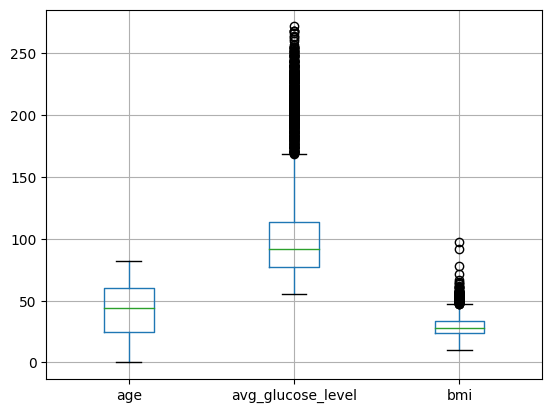

In [56]:
# 2. Visualize the dataset using Matplotlib. Include at least one scatter plot, bar graph and
# box plot
box = file1.boxplot(column=['age', 'avg_glucose_level', 'bmi'])
box

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

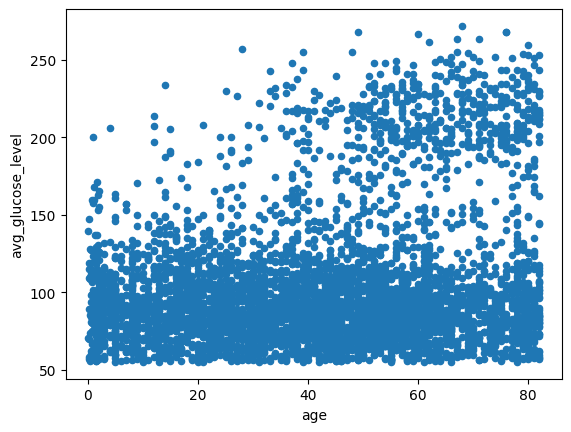

In [57]:
# scatter plot
scatter = file1.plot.scatter(x='age', y='avg_glucose_level')
scatter

In [58]:
#now implement decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#split data into train and test
X = file1.drop(['stroke'], axis=1)
y = file1['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# now implement decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [59]:
#print the accuracy score
accuracy_score(y_test, y_pred)

0.9154786150712831

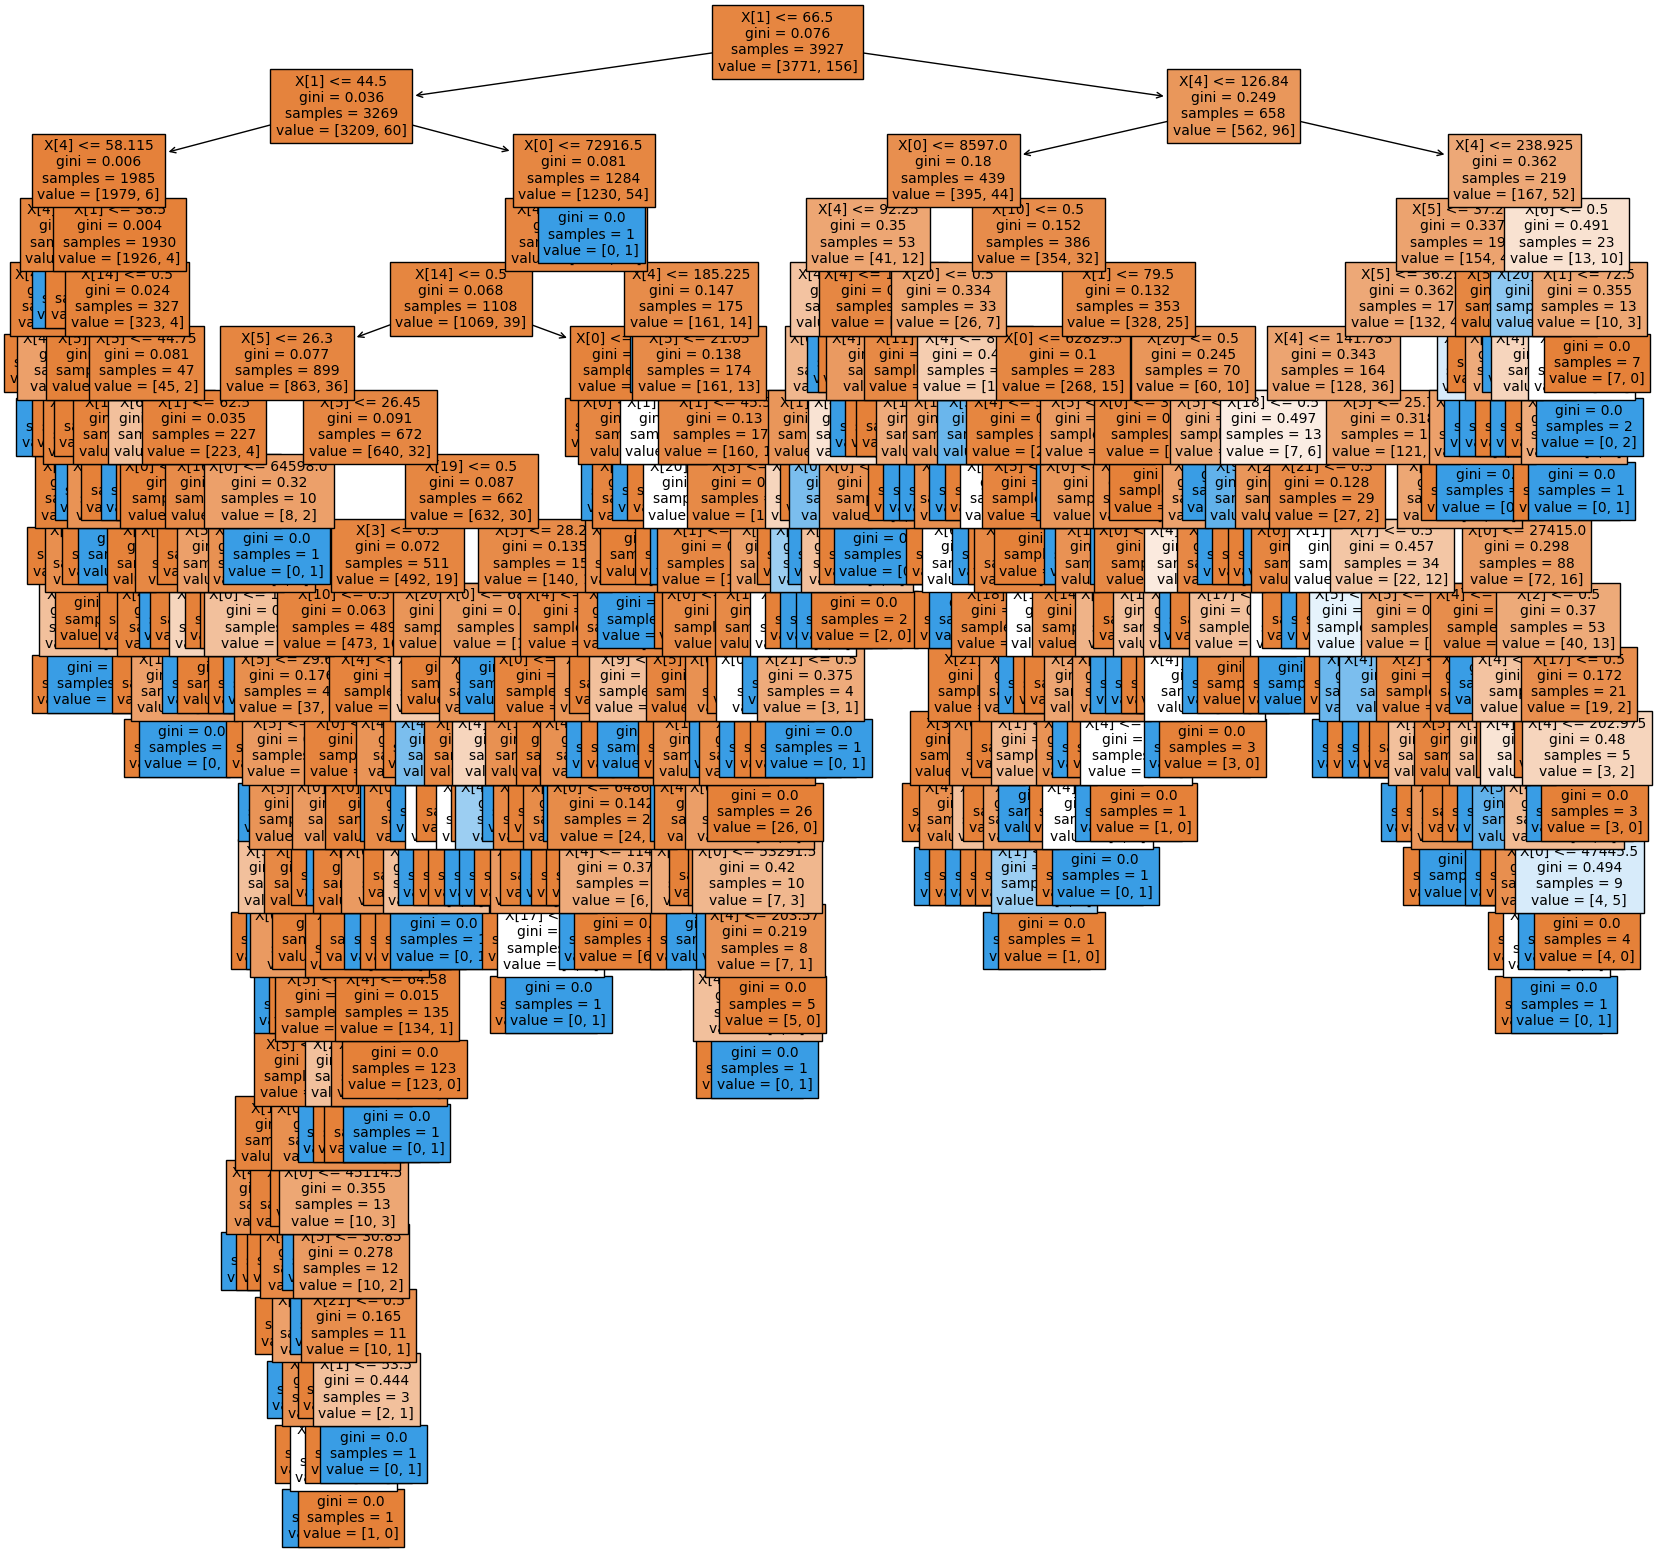

In [60]:
# show the decision tree
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtree, filled=True, fontsize=10)
plt.show()

In [61]:
#now implement naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9012219959266803

<AxesSubplot:>

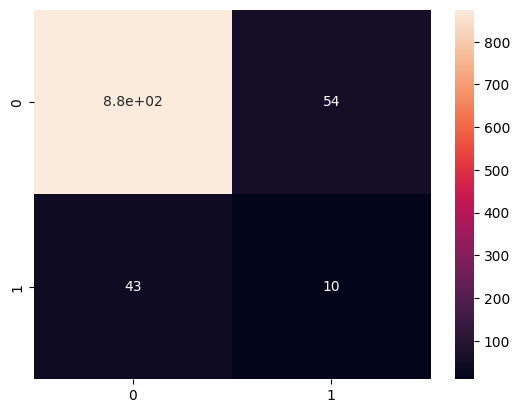

In [62]:
#visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [63]:
#now implement KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9470468431771895

<AxesSubplot:>

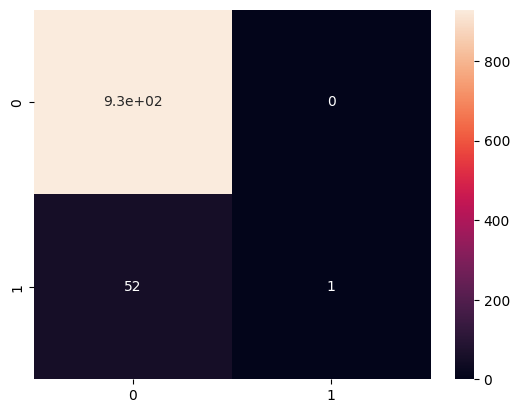

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [65]:
#now implement SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.9460285132382892

<AxesSubplot:>

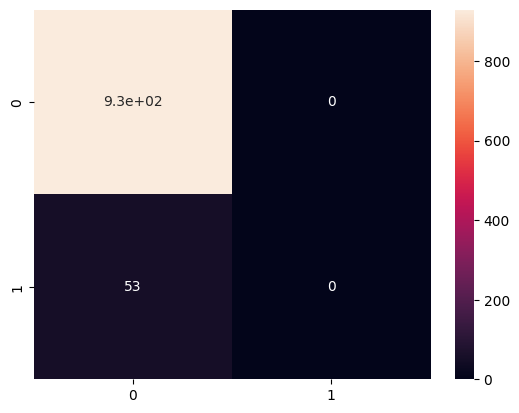

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)